In [1]:
import requests
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = 'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/GAZP.json'
params = {
    'iss.meta': 'off',
    'iss.only': 'history',
    'history.columns': 'TRADEDATE,CLOSE',
    'history.from': '252',
    'history.sort_order': 'TRADEDATE',
    'history.max_items': '252'
}
response = requests.get(url, params=params)
data = response.json()

price_history = data['history']['data']

df = pd.DataFrame(price_history, columns=['TRADEDATE', 'CLOSE'])
df.to_excel('GAZP_Price.xlsx', index=False)


In [2]:
prices = df["CLOSE"].values
returns=[0]

for i in range(1,len(prices)):
    returns.append((prices[i]-prices[i-1])/prices[i-1])
a = 0.99
T = 1  

VaR_long = -np.percentile(returns, a * 100)
VaR_short = -np.percentile(returns, (1 - a) * 100)

results = pd.DataFrame({"VAR_long": [VaR_long], "VAR_short": [VaR_short]})

results.to_excel("VAR.xlsx", index=False)


In [3]:
df['D']=returns
print(df.tail(30))

     TRADEDATE   CLOSE         D
70  2014-09-17  137.00 -0.011259
71  2014-09-18  138.20  0.008759
72  2014-09-19  135.99 -0.015991
73  2014-09-22  135.05 -0.006912
74  2014-09-23  136.50  0.010737
75  2014-09-24  137.80  0.009524
76  2014-09-25  136.92 -0.006386
77  2014-09-26  137.11  0.001388
78  2014-09-29  135.77 -0.009773
79  2014-09-30  137.90  0.015688
80  2014-10-01  137.26 -0.004641
81  2014-10-02  134.25 -0.021929
82  2014-10-03  135.80  0.011546
83  2014-10-06  138.90  0.022828
84  2014-10-07  137.10 -0.012959
85  2014-10-08  134.61 -0.018162
86  2014-10-09  135.64  0.007652
87  2014-10-10  133.21 -0.017915
88  2014-10-13  135.25  0.015314
89  2014-10-14  135.50  0.001848
90  2014-10-15  134.50 -0.007380
91  2014-10-16  132.41 -0.015539
92  2014-10-17  134.60  0.016540
93  2014-10-20  134.10 -0.003715
94  2014-10-21  134.00 -0.000746
95  2014-10-22  133.50 -0.003731
96  2014-10-23  133.50  0.000000
97  2014-10-24  133.99  0.003670
98  2014-10-27  134.07  0.000597
99  2014-1

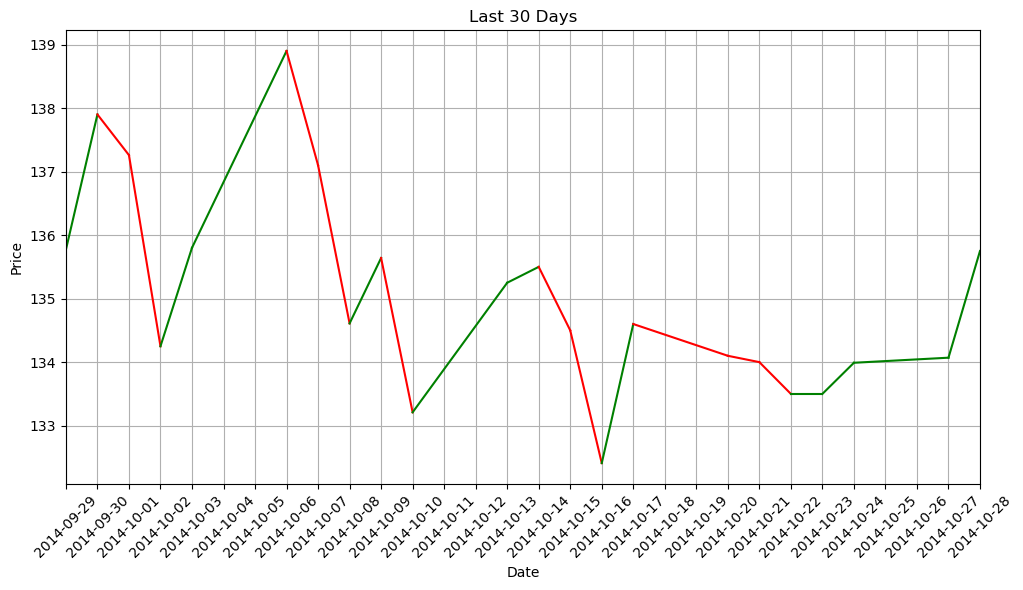

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
max_date = df['TRADEDATE'].max()
start_date = max_date - pd.DateOffset(days=30)
df_last_30_days = df[(df['TRADEDATE'] >= start_date) & (df['TRADEDATE'] <= max_date)] 

plt.figure(figsize=(10, 6))

for i in range(1, len(df_last_30_days)):
    colour = 'green' if df_last_30_days['D'].iloc[i] >= 0 else 'red'
    plt.plot(
        [df_last_30_days['TRADEDATE'].iloc[i - 1], df_last_30_days['TRADEDATE'].iloc[i]],
        [df_last_30_days['CLOSE'].iloc[i - 1], df_last_30_days['CLOSE'].iloc[i]],
        color=colour, linestyle='-'
    )
plt.xlim(df_last_30_days['TRADEDATE'].iloc[0], df_last_30_days['TRADEDATE'].iloc[-1])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.savefig('Trend.pdf')
